<a href="https://colab.research.google.com/github/pavana-p-kulal/Applications-of-Python-Programming-in-DA-and-ML/blob/master/Day_2_session_2_Titanic_survival_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages needed for the procedure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Coding for importing csv files in Google colab
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['titanic1.csv']))
# read data as data
#df = pd.read_csv("/home/cyborg/Desktop/Workshop on DA and ML for IIIT internship students/Day 4-7/C
# check the dimension of t1he table
print("The dimension of the table is: ",df.shape)
# check the columns
df.columns

Saving titanic1.csv to titanic1.csv
The dimension of the table is:  (891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


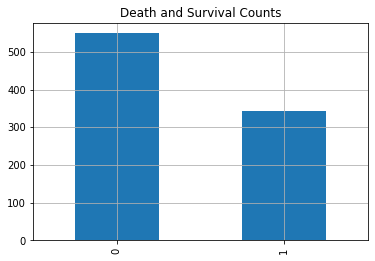

In [4]:
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
plt.show()

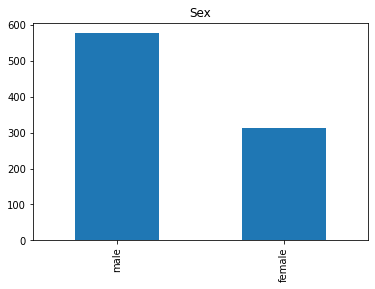

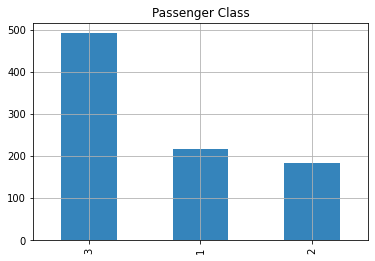

In [5]:
#From this,we infer that majority of people did not survive the accident.
df['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.show()
#It can be infered that the majority of people in the ship were male.
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',alpha=0.90,grid=True)
plt.show()
#

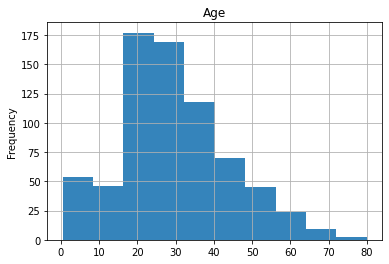

In [6]:
df['Age'].plot(kind='hist',title='Age',alpha=0.90,grid=True)
plt.show()

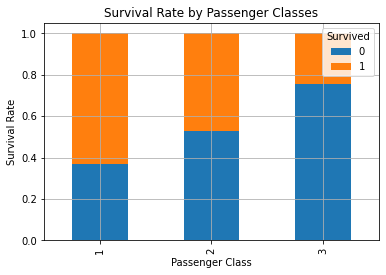

In [7]:
#It can be infered that majority of passengers were in the age group 15-30 years.
#Feature1 : Passenger Class
# finding survival rate in the passenger class
rel_1=pd.crosstab(df['Pclass'],df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
#

In [8]:
#Those in First Class has the highest chance for survival.
#Feature2 : Sex
#We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


to find survival rate by sex


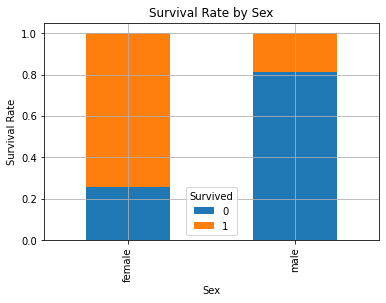

In [9]:

rel_2=pd.crosstab(df['Sex'],df['Survived'])
rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked=True,grid=True)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

Get the unique values of places

In [10]:
passenger_classes = sorted(df['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [12]:
for i in passenger_classes:
       print ('M : ',i ,len(df[(df['Sex'] == 'male') & (df['Pclass'] == i)]))
       print ('F : ',i ,len(df[(df['Sex'] =='female') & (df['Pclass'] == i)]))
male=df[df['Sex']=='male']
female=df[df['Sex']=='female']

M :  1 122
F :  1 94
M :  2 108
F :  2 76
M :  3 347
F :  3 144


#Plot survival rate by Sex and Pclass:

In [15]:
male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize=male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel_normalize.plot(kind='bar',title='Survival rate of male by passenger classes',stacked='True'
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize=female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel_normalize.plot(kind='bar',title='Survival rate of female by passenger classes',stacked='T
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

SyntaxError: ignored

In [16]:
df['Embarked_Value']=df['Embarked']
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs
#df.head(10)

[1.0, 2.0, 3.0, nan]

#Visualization of embarkpoints

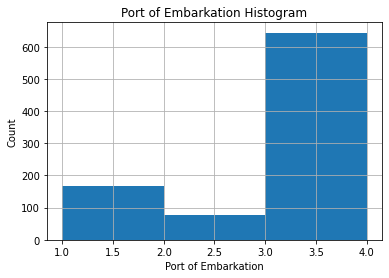

In [17]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,4),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [18]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,NaN


Thus we can see that the Embarked Column is missing certain values, which have to be filled
#otherwise it may cause problems during the application of machine learning algorithms.
#Since the majority of passengers embarked in 'S': 3,
#we assign the missing values in Embarked to 'S':

In [33]:
df['Embarked_Value']=df['Embarked_Value'].fillna(3)
df['Embarked']=df['Embarked'].fillna('S')
embarked_locs = sorted(df[ Embarked_Value ].unique())
print(embarked_locs)
embarked_locs1 = sorted(df['Embarked'].unique())
print(embarked_locs1)

NameError: ignored

In [28]:
df[df['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,3.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,2.0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1,3.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0,1.0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0,2.0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1,1.0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,1,1.0


In [36]:
df['Age_complete'] = df['Age']
df['Age_complete']=df['Age_complete'].groupby([df['Sex_Val'],df['Pclass']]).apply(lambda x: x.fillna
df['Age_complete'].head(10)

SyntaxError: ignored

In [35]:
# import packages needed for the procedure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Coding for importing csv files in Google colab
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['datasets_11657_16098_train.csv']))
# read data as data
#df = pd.read_csv("/home/cyborg/Desktop/Workshop on DA and ML for IIIT internship students/Day 4-7/C
# check the dimension of t1he table
print("The dimension of the table is: ",df.shape)
# check the columns
df.columns

Saving datasets_11657_16098_train.csv to datasets_11657_16098_train (1).csv
The dimension of the table is:  (891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
df['Embarked_Value']=df['Embarked_Value'].fillna(3)
df['Embarked']=df['Embarked'].fillna('S')
embarked locs = sorted(df['Embarked Value'].unique())
embarked_locs sorted(df[ Embarked_Value ].unique())
print(embarked_locs)
embarked_locs1 = sorted(df['Embarked'].unique())
print(embarked_locs1)

SyntaxError: ignored

In [41]:
df['Age_complete'] = df['Age']
df['Age_complete']=df['Age_complete'].groupby([df['Sex_Val'],df['Pclass']]).apply(lambda x: x.fillna
df['Age_complete'].head(10)

SyntaxError: ignored

In [42]:
df[df['Age_complete'].isnull()].head(10)

KeyError: ignored

In [43]:
# import packages needed for the procedure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Coding for importing csv files in Google colab
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['titanic1.csv']))
# read data as data
#df = pd.read_csv("/home/cyborg/Desktop/Workshop on DA and ML for IIIT internship students/Day 4-7/C
# check the dimension of t1he table
print("The dimension of the table is: ",df.shape)
# check the columns
df.columns

Saving titanic1.csv to titanic1.csv
The dimension of the table is:  (891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')